In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

c:\Users\user\miniconda3\envs\this_is_da\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# 데이터 확인

In [2]:
df = pd.read_csv('data/logistic.csv', encoding='cp949')

- features 확인

In [3]:
df.head()

,index,송하인_격자공간고유번호,수하인_격자공간고유번호,물품_카테고리,운송장_건수
0,0,5011000595017300,2871000192069300,음반,3
1,1,4148000690043300,5011000264024400,문화컨텐츠,3
2,2,5011000078068400,1120000007005400,농산물,3
3,3,4127100048006400,5011000587019400,기타식품,7
4,4,5011000078068400,2823700010076300,농산물,3


# 데이터 EDA & 전처리

## 기본 정보

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31684 entries, 0 to 31683
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   index         31684 non-null  int64 
 1   송하인_격자공간고유번호  31684 non-null  int64 
 2   수하인_격자공간고유번호  31684 non-null  int64 
 3   물품_카테고리       31684 non-null  object
 4   운송장_건수        31684 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 1.2+ MB


In [5]:
# 데이터 샘플은 많고, 특징은 적다
df.shape

(31684, 5)

In [6]:
# 운송장 건수의 최대값이 많이 높아 보인다. -> 이상치라고 판단해야 하나?
df.describe()

,index,송하인_격자공간고유번호,수하인_격자공간고유번호,운송장_건수
count,31684.000000,3.168400e+04,3.168400e+04,31684.000000
mean,15841.500000,4.648814e+15,3.801369e+15,4.879308
std,9146.527301,8.341336e+14,1.314660e+15,6.756473
min,0.000000,1.111000e+15,1.111000e+15,3.000000
25%,7920.750000,4.713000e+15,2.826000e+15,3.000000
50%,15841.500000,5.011000e+15,4.159000e+15,3.000000
75%,23762.250000,5.013001e+15,5.011000e+15,5.000000
max,31683.000000,5.013001e+15,5.013001e+15,413.000000


In [7]:
# 결측치는 없다
df.isnull().sum()

index           0
송하인_격자공간고유번호    0
수하인_격자공간고유번호    0
물품_카테고리         0
운송장_건수          0
dtype: int64

In [8]:
# 출발지/도착지 고유번호 및 운송장 건수에 대한 쏠림 현상은 대도시/소도시, 택배 대표 물룸별로 나눠지기에, 해소 보다는 특징으로 살펴봐야 할 것 같다.
df.skew()

index            0.000000
송하인_격자공간고유번호    -3.025235
수하인_격자공간고유번호    -1.005811
운송장_건수          18.083137
dtype: float64

In [9]:
df.columns

Index(['index', '송하인_격자공간고유번호', '수하인_격자공간고유번호', '물품_카테고리', '운송장_건수'], dtype='object')

In [10]:
# 연속형/범주형 특징이 섞여 있다.
for col in df.columns:
    print(f'{col} num : ', len(df[col].unique()))
    print(f'{col} : ', df[col].unique())

index num :  31684
index :  [    0     1     2 ... 31681 31682 31683]
송하인_격자공간고유번호 num :  4229
송하인_격자공간고유번호 :  [5011000595017300 4148000690043300 5011000078068400 ... 2638000008087200
 1120000013030100 2811000139076100]
수하인_격자공간고유번호 num :  26875
수하인_격자공간고유번호 :  [2871000192069300 5011000264024400 1120000007005400 ... 5013000954034200
 5011000213073200 5011000263065200]
물품_카테고리 num :  100
물품_카테고리 :  ['음반' '문화컨텐츠' '농산물' '기타식품' '수산' '아우터' '신발' '건강식품' '음료' '가공식품' '스킨케어' '축산'
 '헤어케어' '기저귀/물티슈' '의료용품' '기타디지털/가전' '상의' '건강용품' '바디케어' '기타스포츠/레저'
 '출산/유아동의류' '반려동물' '완구/매트' '과자' '생활용품' '하의' '문구/사무용품' '선케어' '다이어트식품'
 '기타패션의류' '냉동/간편조리식품' '네일케어' '서재/사무용가구' '선글라스/안경테' '기타화장품/미용' '등산' '모니터'
 '주방용품' '색조메이크업' '침구세트' '침구단품' '인테리어소품' '양말/스타킹' '클렌징' '공구' '이미용가전' 'PC'
 '커튼/블라인드' '헤어스타일링' '주방가구' 'DIY자재/용품' '헤어액세서리' '김치' '위생/건강용품' '침실가구' '가방'
 '주방가전' '낚시' '재활운동용품' '자동차용품' '뷰티소품' '주얼리' '골프' 'PC주변기기' '수납/정리용품' '음향가전'
 '잠옷' '패션소품' '언더웨어' '원피스/점프슈트' '스포츠잡화' '수납가구' '취미용품' '아웃도어가구' '계절가전' '홈데코'
 '캠핑' '남성화장품' '분유/이유식

## 배송지역 탐색

- 컬럼 rename

In [11]:
df.columns = ['index', 'start', 'end', 'product', 'cnt']
df.head()

,index,start,end,product,cnt
0,0,5011000595017300,2871000192069300,음반,3
1,1,4148000690043300,5011000264024400,문화컨텐츠,3
2,2,5011000078068400,1120000007005400,농산물,3
3,3,4127100048006400,5011000587019400,기타식품,7
4,4,5011000078068400,2823700010076300,농산물,3


- 도착지의 건수가 너무 적어서, 출발지의 건수를 기준으로 분석 진행

In [12]:
df['start'].value_counts()

5011000078068400    3882
5013000610049100    1790
5013000731055200    1235
5011000137030100    1137
5013000821028200     731
                    ... 
4511300030055300       1
4719000321023400       1
4423000423020300       1
4711300748080100       1
2811000139076100       1
Name: start, Length: 4229, dtype: int64

In [13]:
df['end'].value_counts()

5013000635005300    35
5011000543041100    33
5011000314069300    33
5011000544072300    30
5011000318044100    30
                    ..
5011000109040100     1
4183000550093100     1
4425000028078200     1
1147000011064300     1
5011000263065200     1
Name: end, Length: 26875, dtype: int64

- 출발-도착 중복 데이터 존재

In [14]:
all_list = list(df['start']) + list(df['end'])
unique_list = set(all_list)

print('unique: ', len(unique_list))
print('data len :', len(df))
print('중복 : ', len(df) - len(unique_list))

unique:  30455
data len : 31684
중복 :  1229


## 물품 카테고리 탐색

- 물폼 100개에 대한 cnt(배송량)

In [15]:
df['product'].value_counts()

농산물              20321
문화컨텐츠             1091
음료                1034
수산                 860
가공식품               846
                 ...  
유아가구                 4
기타출산/육아              4
태블릿PC/노트북액세서리        4
선케어                  4
스포츠잡화                4
Name: product, Length: 100, dtype: int64

In [16]:
df.groupby('product', as_index=False)['cnt'].sum().sort_values(by='cnt', ascending=False)

,product,cnt
27,농산물,87829
66,음료,5890
3,가공식품,5766
34,문화컨텐츠,5429
51,수산,4880
...,...,...
18,기타출산/육아,22
79,지갑,22
48,세탁용품,20
65,유아가구,13


In [17]:
df_cnt = df.groupby('product', as_index=False)['cnt'].sum()
df_cnt = df_cnt.sort_values(by=['cnt'], ascending=False)
df_cnt

,product,cnt
27,농산물,87829
66,음료,5890
3,가공식품,5766
34,문화컨텐츠,5429
51,수산,4880
...,...,...
18,기타출산/육아,22
79,지갑,22
48,세탁용품,20
65,유아가구,13


- 위에서도 보았듯이, 농산물이 특히 많은 것을 볼 수 있다.

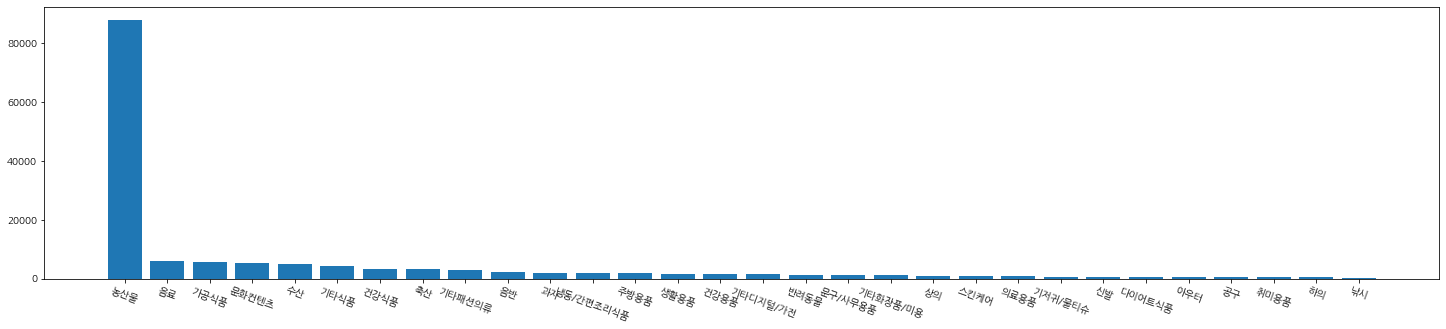

In [18]:
plt.bar(df_cnt['product'][0:30], df_cnt['cnt'][0:30], label='cnt')
plt.xticks(rotation =-20)
plt.gcf().set_size_inches(25, 5)
plt.show()

- 농산물을 제외하고 다시 보자

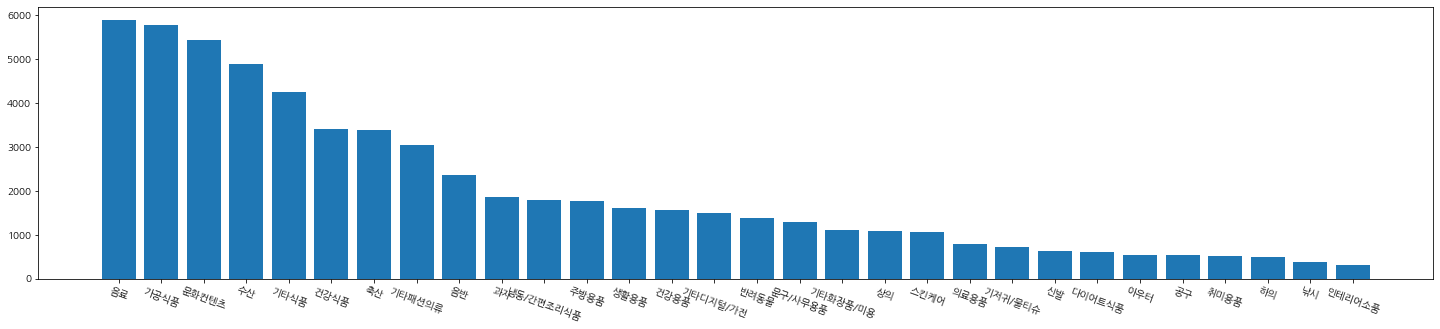

In [19]:
plt.bar(df_cnt['product'][1:31], df_cnt['cnt'][1:31], label='cnt')
plt.xticks(rotation =-20)
plt.gcf().set_size_inches(25, 5)
plt.show()

## 출발지/도착지 분석

- 출발지

In [20]:
df['start'].value_counts()

5011000078068400    3882
5013000610049100    1790
5013000731055200    1235
5011000137030100    1137
5013000821028200     731
                    ... 
4511300030055300       1
4719000321023400       1
4423000423020300       1
4711300748080100       1
2811000139076100       1
Name: start, Length: 4229, dtype: int64

In [21]:
len(df['start'].value_counts())

4229

In [22]:
# 배송 건수가 num_cnt보다 높은 것의 건수 확인
num_cnt = 5
sum(df['start'].value_counts() > num_cnt)

649

- 물품 건수가 5건 이상의 649개에 대한 출발 배송 건수가 전체 80% 이상을 차지한다.
- 물품 건수가 5건 이상에 대해서 '배차' 진행하는 것이 좋아 보인다.

In [23]:
num_cnt = 5
start_num = sum(df['start'].value_counts() > num_cnt)
print('start_num :', start_num)

# 전체 배송 건수 대비 num_cnt에 대한 비율
df['start'].value_counts()[:start_num].sum() / df['start'].value_counts().sum()

start_num : 649


0.82391743466734

- 도착지

In [24]:
df['end'].value_counts()

5013000635005300    35
5011000543041100    33
5011000314069300    33
5011000544072300    30
5011000318044100    30
                    ..
5011000109040100     1
4183000550093100     1
4425000028078200     1
1147000011064300     1
5011000263065200     1
Name: end, Length: 26875, dtype: int64

In [25]:
# 배송 건수가 num_cnt보다 높은 것의 건수 확인
num_cnt = 2
sum(df['end'].value_counts() > num_cnt)

820

In [26]:
# 건수가 너무 적다
num_cnt = 2
end_num = sum(df['end'].value_counts() > num_cnt)
print('end_num :', end_num)

# 전체 배송 건수 대비 num_cnt에 대한 비율
df['end'].value_counts()[:end_num].sum() / df['end'].value_counts().sum()

end_num : 820


0.1135273324075243

In [27]:
# 도착지는 2만건으로 검색해야 약 80% 비율을 맞춘다
df['end'].value_counts().head(20000).sum() / df['end'].value_counts().sum()

0.7830135083954046

- 출발/도착지 코드 별

In [28]:
df_start_end = pd.DataFrame({'start':df['start'].value_counts(), 'end':df['end'].value_counts()})
df_start_end.fillna(0, inplace=True)
df_start_end['total'] = df_start_end['start'] + df_start_end['end']
df_start_end

,start,end,total
1111000004097200,0.0,1.0,1.0
1111000005062300,0.0,1.0,1.0
1111000005067400,0.0,1.0,1.0
1111000007059100,0.0,1.0,1.0
1111000007071100,0.0,1.0,1.0
...,...,...,...
5013000954034200,0.0,1.0,1.0
5013000954034300,0.0,2.0,2.0
5013000954042300,0.0,1.0,1.0
5013000957072200,0.0,1.0,1.0


- 출발지 기준으로 분석을 해야함을 재확인
- 출발지와 도착지가 같은 고유번호 존재 : 반품인가?

In [29]:
df_start_end.sort_values(by='start', ascending=False)

,start,end,total
5011000078068400,3882.0,14.0,3896.0
5013000610049100,1790.0,0.0,1790.0
5013000731055200,1235.0,0.0,1235.0
5011000137030100,1137.0,2.0,1139.0
5013000821028200,731.0,0.0,731.0
...,...,...,...
4111700017060200,0.0,1.0,1.0
4111700017046100,0.0,1.0,1.0
4111700017039400,0.0,1.0,1.0
4111700017037300,0.0,1.0,1.0


## 유통경로 분석

In [30]:
df.head()

,index,start,end,product,cnt
0,0,5011000595017300,2871000192069300,음반,3
1,1,4148000690043300,5011000264024400,문화컨텐츠,3
2,2,5011000078068400,1120000007005400,농산물,3
3,3,4127100048006400,5011000587019400,기타식품,7
4,4,5011000078068400,2823700010076300,농산물,3


In [31]:
# 자주 배송되는 특정 경로는 없어 보인다.
df_route = df.groupby(['start', 'end'], as_index=False)['product'].count()
df_route = df_route.sort_values(by='product', ascending=False)
df_route

,start,end,product
3684,4141000031030100,5013000635005300,7
6712,4211000650079200,5011000437052400,7
735,1154500001021400,5011000214025100,5
3664,4141000031030100,5011000596012200,5
6962,4374500066090200,5011000427079100,5
...,...,...,...
10588,5011000078068400,4148000585018400,1
10587,5011000078068400,4148000557021300,1
10586,5011000078068400,4148000556065200,1
10585,5011000078068400,4148000511072200,1


In [32]:
idx = 2
s, e, p = df_route.iloc[idx, :]

df[(df['start']==s) & (df['end']==e)]

,index,start,end,product,cnt
2944,2944,1154500001021400,5011000214025100,베이스메이크업,14
14018,14018,1154500001021400,5011000214025100,바디케어,3
15826,15826,1154500001021400,5011000214025100,다이어트식품,3
22972,22972,1154500001021400,5011000214025100,클렌징,13
31630,31630,1154500001021400,5011000214025100,스킨케어,48


## 출발지 배차 분석

- 출발지 코드 별 가장 많이 배송하는 물품을 대표 물품으로 선정

In [33]:
idx = 0
s, e, p = df_route.iloc[idx, :]

df[(df['start']==s) & (df['end']==e)]

,index,start,end,product,cnt
4810,4810,4141000031030100,5013000635005300,주방용품,7
5657,5657,4141000031030100,5013000635005300,이미용가전,4
14325,14325,4141000031030100,5013000635005300,스킨케어,7
17413,17413,4141000031030100,5013000635005300,생활가전,3
19976,19976,4141000031030100,5013000635005300,음료,3
20177,20177,4141000031030100,5013000635005300,베이스메이크업,5
22653,22653,4141000031030100,5013000635005300,상의,3


In [34]:
df[df['start']==s].groupby('product')['cnt'].sum().sort_values(ascending=False).reset_index()

,product,cnt
0,건강용품,468
1,스킨케어,232
2,상의,165
3,아우터,133
4,건강식품,118
5,가공식품,103
6,주방용품,80
7,기저귀/물티슈,73
8,베이스메이크업,55
9,생활용품,40


In [35]:
df[df['start']==s].groupby('product')['cnt'].sum().sort_values(ascending=False).reset_index()[:1]

,product,cnt
0,건강용품,468


In [36]:
df[df['start']==s].groupby('product')['cnt'].sum().sort_values(ascending=False).reset_index()['cnt'].sum()

1825

- 출발지 코드 별 가장 많은 건수만 list에 담아서 데이터프레임

In [37]:
list_of_df = []

for i in list(df['start'].unique()):
    loop_df = df[df['start']==i].groupby('product')['cnt'].sum().sort_values(ascending=False).reset_index()[:1]
    loop_df['id'] = i
    list_of_df.append(loop_df)

list_of_df

[  product   cnt                id
 0      음반  1652  5011000595017300,
   product  cnt                id
 0   문화컨텐츠  383  4148000690043300,
   product    cnt                id
 0     농산물  14380  5011000078068400,
   product  cnt                id
 0    기타식품   96  4127100048006400,
   product  cnt                id
 0     농산물  492  5013000778073200,
   product   cnt                id
 0      수산  1347  5011000316024300,
   product  cnt                id
 0     농산물  486  5013000740006400,
   product  cnt                id
 0     아우터    3  4136000209094100,
   product  cnt                id
 0     농산물  100  5011000315056100,
   product  cnt                id
 0     농산물  376  5011000525070400,
   product   cnt                id
 0     농산물  4579  5013000731055200,
   product  cnt                id
 0      신발    9  4146300018047300,
   product  cnt                id
 0     농산물  178  5013000823047200,
   product   cnt                id
 0     농산물  4054  5011000137030100,
   product  cnt       

In [38]:
df_accum_start = pd.concat(list_of_df)
df_accum_start

,product,cnt,id
0,음반,1652,5011000595017300
0,문화컨텐츠,383,4148000690043300
0,농산물,14380,5011000078068400
0,기타식품,96,4127100048006400
0,농산물,492,5013000778073200
...,...,...,...
0,기타패션잡화,9,4113300019005400
0,침구세트,4,4873000294001400
0,기타패션잡화,105,2638000008087200
0,스마트디바이스액세서리,3,1120000013030100


In [39]:
# 모든 물품이 해당되지는 않는다.
len(df_accum_start['product'].unique()), len(df['product'].unique())

(98, 100)

- 물품별 전체 배송량

In [40]:
df.groupby('product', as_index=False)['cnt'].sum()

,product,cnt
0,DIY자재/용품,150
1,PC,200
2,PC주변기기,30
3,가공식품,5766
4,가방,26
...,...,...
95,헤어스타일링,32
96,헤어액세서리,59
97,헤어케어,240
98,헬스,93


In [41]:
df_product_sum = df.groupby('product', as_index=False)['cnt'].sum()
df_product_sum

,product,cnt
0,DIY자재/용품,150
1,PC,200
2,PC주변기기,30
3,가공식품,5766
4,가방,26
...,...,...
95,헤어스타일링,32
96,헤어액세서리,59
97,헤어케어,240
98,헬스,93


- 데이터 통합(배송지별 대표 물품과 해당 물품의 전체 수량)

In [42]:
pd.merge(df_accum_start, df_product_sum, how='left', on='product')

,product,cnt_x,id,cnt_y
0,음반,1652,5011000595017300,2357
1,문화컨텐츠,383,4148000690043300,5429
2,농산물,14380,5011000078068400,87829
3,기타식품,96,4127100048006400,4250
4,농산물,492,5013000778073200,87829
...,...,...,...,...
4224,기타패션잡화,9,4113300019005400,152
4225,침구세트,4,4873000294001400,84
4226,기타패션잡화,105,2638000008087200,152
4227,스마트디바이스액세서리,3,1120000013030100,72


In [43]:
df_merge = pd.merge(df_accum_start, df_product_sum, how='left', on='product')
df_merge.columns = ['product', 'cnt', 'id', 'total']
df_merge = df_merge[['id', 'product', 'cnt', 'total']]
df_merge

,id,product,cnt,total
0,5011000595017300,음반,1652,2357
1,4148000690043300,문화컨텐츠,383,5429
2,5011000078068400,농산물,14380,87829
3,4127100048006400,기타식품,96,4250
4,5013000778073200,농산물,492,87829
...,...,...,...,...
4224,4113300019005400,기타패션잡화,9,152
4225,4873000294001400,침구세트,4,84
4226,2638000008087200,기타패션잡화,105,152
4227,1120000013030100,스마트디바이스액세서리,3,72


- 출발지 별 물품 배소양 중 50% 이상을 출발 시키는 곳에 특정 배차를 할 수 있도록 출발지 선정

In [44]:
df_merge['ratio'] = df_merge['cnt'] / df_merge['total']
df_merge

,id,product,cnt,total,ratio
0,5011000595017300,음반,1652,2357,0.700891
1,4148000690043300,문화컨텐츠,383,5429,0.070547
2,5011000078068400,농산물,14380,87829,0.163727
3,4127100048006400,기타식품,96,4250,0.022588
4,5013000778073200,농산물,492,87829,0.005602
...,...,...,...,...,...
4224,4113300019005400,기타패션잡화,9,152,0.059211
4225,4873000294001400,침구세트,4,84,0.047619
4226,2638000008087200,기타패션잡화,105,152,0.690789
4227,1120000013030100,스마트디바이스액세서리,3,72,0.041667


In [45]:
df_merge[df_merge['ratio'] > 0.5]

,id,product,cnt,total,ratio
0,5011000595017300,음반,1652,2357,0.700891
57,4148000427007400,출산/유아동의류,23,30,0.766667
70,4148000690015300,문화컨텐츠,3064,5429,0.564376
96,1117000009037100,기타디지털/가전,837,1505,0.556146
359,4127300022051100,위생/건강용품,135,249,0.542169
457,5011000320025200,네일케어,35,69,0.507246
584,4873000228047300,낚시,316,386,0.818653
596,4150000196034300,다이어트식품,419,619,0.676898
1109,4117300018005400,기타패션의류,1605,3042,0.527613
1129,4413300143027400,신발,392,637,0.615385


# 모델링

- 거래량 예측(회귀 분석)
- 트리 계열 RandomForestRegressor 사용

In [58]:
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score as r2
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ParameterGrid

## 데이터 분리

In [48]:
X = df.drop(['index', 'cnt'], axis=1)
Y = df['cnt']

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.3, random_state=29)

train_x.shape, train_y.shape, test_x.shape, test_y.shape

((22178, 3), (22178,), (9506, 3), (9506,))

In [49]:
train_x

,start,end,product
12320,1165000003085400,5011000430002200,문화컨텐츠
7893,5011000078068400,4812700063006300,농산물
4600,2623000010074100,5013000818064300,상의
22416,5013000731055200,4122000183059400,농산물
7959,5011000486060300,4125000056028100,음료
...,...,...,...
808,5011000595017300,4111100027035100,음반
28194,4148000699072200,5011000318012200,음반
10749,4678000411005300,5011000133083200,냉동/간편조리식품
6380,5011000685067100,4163000217096400,농산물


In [50]:
train_y

12320    5
7893     3
4600     4
22416    3
7959     3
        ..
808      3
28194    3
10749    3
6380     4
24533    4
Name: cnt, Length: 22178, dtype: int64

### LabelEncoder

- product는 범주형 수치형으로 대체
- 트리 기반을 제외한, 다른 회귀 분석에서 사용 시 rank에 영향을 받기에 주의
- 원-핫 인코딩을 하기에는 카테고리가 너무 많다.

In [51]:
le = LabelEncoder()
le.fit(df['product'])

LabelEncoder()

In [52]:
df['product_le'] = le.transform(df['product'])
df.head()

,index,start,end,product,cnt,product_le
0,0,5011000595017300,2871000192069300,음반,3,67
1,1,4148000690043300,5011000264024400,문화컨텐츠,3,34
2,2,5011000078068400,1120000007005400,농산물,3,27
3,3,4127100048006400,5011000587019400,기타식품,7,17
4,4,5011000078068400,2823700010076300,농산물,3,27


In [53]:
df

,index,start,end,product,cnt,product_le
0,0,5011000595017300,2871000192069300,음반,3,67
1,1,4148000690043300,5011000264024400,문화컨텐츠,3,34
2,2,5011000078068400,1120000007005400,농산물,3,27
3,3,4127100048006400,5011000587019400,기타식품,7,17
4,4,5011000078068400,2823700010076300,농산물,3,27
...,...,...,...,...,...,...
31679,31679,4471000290087200,5011000213073200,스포츠잡화,3,55
31680,31680,1129000014045300,5011000319087100,스마트디바이스,4,52
31681,31681,1129000014045300,5011000263065200,스마트디바이스,6,52
31682,31682,4127300065073100,5011000264061200,지갑,7,79


In [55]:
train_x['product'] = le.transform(train_x['product'])
test_x['product'] = le.transform(test_x['product'])

In [56]:
train_x

,start,end,product
12320,1165000003085400,5011000430002200,34
7893,5011000078068400,4812700063006300,27
4600,2623000010074100,5013000818064300,41
22416,5013000731055200,4122000183059400,27
7959,5011000486060300,4125000056028100,66
...,...,...,...
808,5011000595017300,4111100027035100,67
28194,4148000699072200,5011000318012200,67
10749,4678000411005300,5011000133083200,25
6380,5011000685067100,4163000217096400,27


In [57]:
test_x

,start,end,product
21797,4119900011099400,5011000373089300,19
17804,5011000175041200,4148000116039200,66
11426,5011000078068400,4145000010065100,27
2933,5013000316036200,3120000135002300,27
18647,5011000318049100,3171000645016300,27
...,...,...,...
30486,5013000571016300,4513000188060200,27
9685,5011000312034400,2817000009053400,51
23882,4148000626030400,5013000818070200,3
7562,4148000690015300,5013000854048100,34


### 하이퍼 파라미터

In [73]:
RFR_param_grid = ParameterGrid({
                                'max_depth':[3, 4, 5, 10, 20, 40],
                                'n_estimators':[100, 200, 400],
                                'random_state':[29, 1000]
})

In [74]:
num_iter = 0
for p in RFR_param_grid:
    num_iter += 1

print('파라미터 iter : ', num_iter)

파라미터 iter :  36


# 학습

In [76]:
best_score = 1e9
iter = 0
for p in RFR_param_grid:
    rfr = RFR(**p)
    rfr.fit(train_x, train_y)
    pred = rfr.predict(test_x)
    score = mae(test_y, pred)
    r2_s = r2(test_y, pred)

    if best_score > score:
        best_score = score
        best_param = p
    iter += 1
    print(f'iteration : {iter}/{num_iter} | best_score : {best_score}')

iteration : 1/36 | best_score : 2.3695042471435
iteration : 2/36 | best_score : 2.3695042471435
iteration : 3/36 | best_score : 2.3695042471435
iteration : 4/36 | best_score : 2.3684780921610353
iteration : 5/36 | best_score : 2.3684780921610353
iteration : 6/36 | best_score : 2.3662968017277786
iteration : 7/36 | best_score : 2.3567667184640912
iteration : 8/36 | best_score : 2.3567667184640912
iteration : 9/36 | best_score : 2.3567667184640912
iteration : 10/36 | best_score : 2.3526220337412
iteration : 11/36 | best_score : 2.3526220337412
iteration : 12/36 | best_score : 2.3519962757694106
iteration : 13/36 | best_score : 2.3519962757694106
iteration : 14/36 | best_score : 2.3519962757694106
iteration : 15/36 | best_score : 2.3519962757694106
iteration : 16/36 | best_score : 2.3519962757694106
iteration : 17/36 | best_score : 2.3519962757694106
iteration : 18/36 | best_score : 2.350936197721498
iteration : 19/36 | best_score : 2.3443870813597227
iteration : 20/36 | best_score : 2.34

In [77]:
best_param

{'max_depth': 10, 'n_estimators': 400, 'random_state': 1000}

### 최종 모델 선정

- 조금의 과적합 경향이 보인다

In [78]:
rfr = RFR(**best_param)
rfr.fit(train_x, train_y)

train_pred = rfr.predict(train_x)
test_pred = rfr.predict(test_x)

print('--train----------------')
print(f'train mae : {mae(train_y, train_pred)}')
print(f'train r2_score : {r2(train_y, train_pred)}')
print('--test----------------')
print(f'test mae : {mae(test_y, test_pred)}')
print(f'test r2_score : {r2(test_y, test_pred)}')

--train----------------
train mae : 2.0519638667350377
train r2_score : 0.4527236430086561
--test----------------
test mae : 2.343018898547239
test r2_score : -0.047262662017021784


In [80]:
result = pd.DataFrame({'Real':test_y, 'Predict':test_pred})
result['diff'] = result['Real'] - result['Predict']
result

,Real,Predict,diff
21797,3,10.249903,-7.249903
17804,3,7.698306,-4.698306
11426,4,3.754333,0.245667
2933,3,4.211633,-1.211633
18647,3,3.871239,-0.871239
...,...,...,...
30486,10,5.470280,4.529720
9685,10,4.445300,5.554700
23882,48,7.316913,40.683087
7562,4,5.107378,-1.107378
